In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [30]:
# 读取图像
img = cv2.imread(r'..\images\Canon\01 - Nov - 23\JPG\DSC_0537 (Pot 2) .JPG')
# img = cv2.imread(r'..\images\water_coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

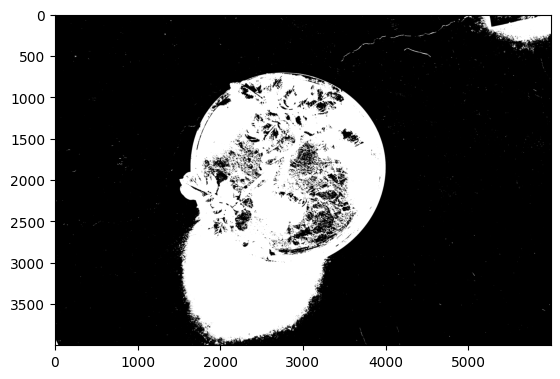

In [24]:
# 应用二值化
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

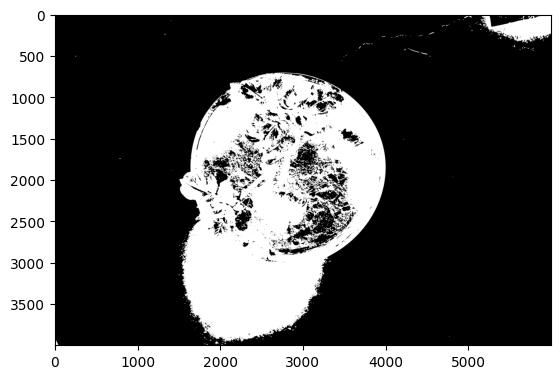

In [25]:
# 使用形态学变换去噪声，确定前景和背景区域
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(opening, cmap='gray')

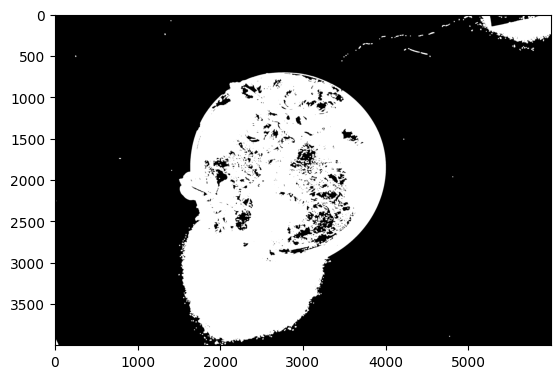

In [26]:
# 确定背景区域
sure_bg = cv2.dilate(opening, kernel, iterations=3)
plt.imshow(sure_bg, cmap='gray')

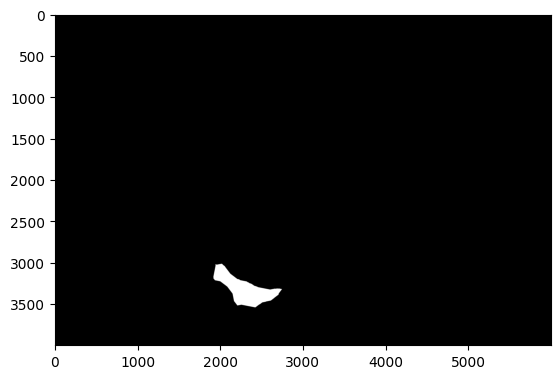

In [27]:
# 确定前景区域
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
plt.imshow(sure_fg, cmap='gray')

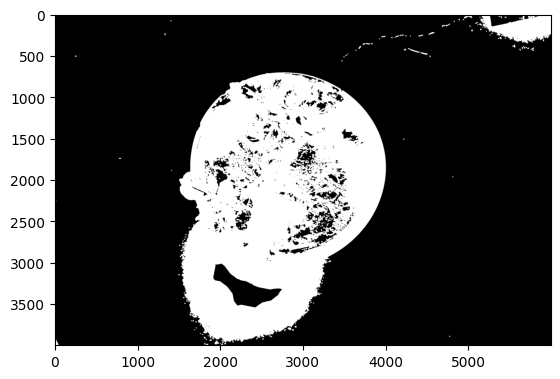

In [28]:
# 寻找未知区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap='gray')

In [54]:
# 标记标签
num, markers = cv2.connectedComponents(sure_fg)

In [55]:
print(markers.shape)
print(markers.dtype)

(4000, 6000)
int32


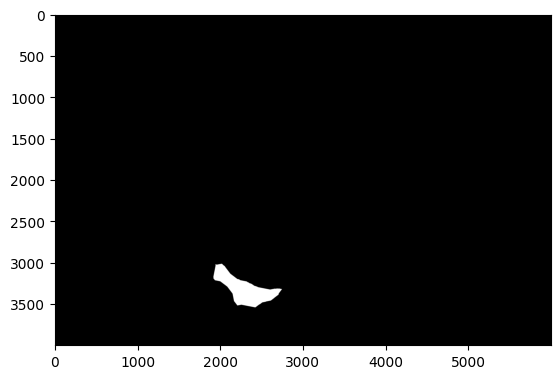

In [10]:
marker_1 = np.zeros_like(markers)
marker_1[markers==1] = 255
plt.imshow(marker_1, cmap='gray')

(4000, 6000)
(4000, 6000, 3)


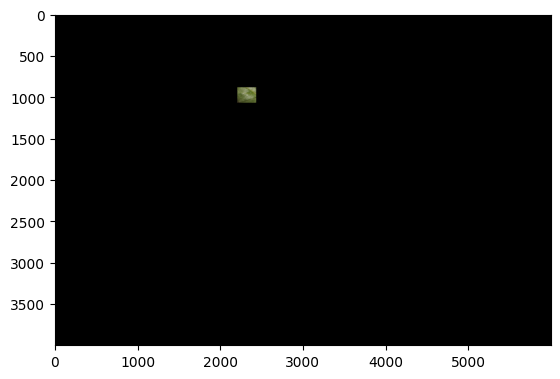

In [48]:
marker_watershed = np.zeros_like(markers)
marker_watershed[885:1073, 2201:2429] = 255 
marker_watershed = np.uint8(marker_watershed)
print(marker_watershed.shape)
print(img.shape)
leaf = cv2.bitwise_and(img, img, mask=marker_watershed)
plt.imshow(leaf[:,:,::-1])


(4000, 6000)
uint8
(4000, 6000, 3)


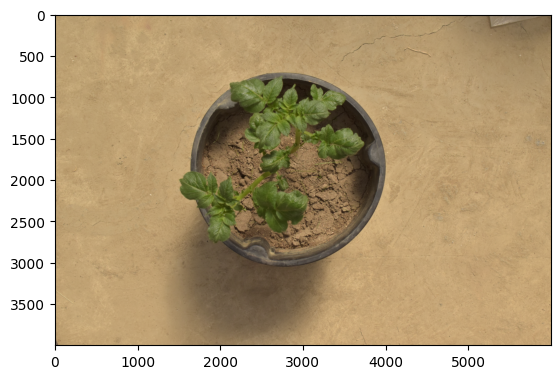

In [51]:
print(marker_watershed.shape)
print(marker_watershed.dtype)
print(img.shape)
plt.imshow(img[:,:,::-1])

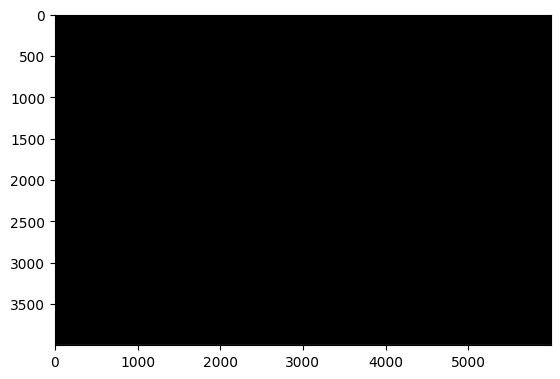

In [57]:

# markers = markers + 1
# 标记未知区域为0
# markers[unknown == 255] = 0
marker_watershed[marker_watershed==255] = 1
marker_watershed = np.int32(marker_watershed)
# 应用分水岭算法
markers = cv2.watershed(img, marker_watershed)

canvas = np.zeros(img.shape[:2])
canvas[markers == -1] = 255  # 将边界标记为红色
plt.imshow(canvas, cmap='gray')
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))